In [1]:
import MetaTrader5 as mt
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime

In [2]:
mt.initialize()

True

In [3]:

login = **********
Path='C:\\Program Files\\FinveoMNMT5Terminal\\terminal64.exe'
password ='**********'
server='FinveoMN-Live'
mt.initialize(Path)
mt.login(login,password,server)


True

In [4]:
CNH=pd.DataFrame(mt.copy_rates_from('USDCNH',mt.TIMEFRAME_D1,datetime.now(),80))
CNH['time']=pd.to_datetime(CNH['time'],unit ='s')
CNH.rename(columns={'close':'CNH'},inplace=True)
#CNH.set_index("time",inplace = True)
CNH

,time,open,high,low,CNH,tick_volume,spread,real_volume
0,2022-03-03,6.31740,6.32617,6.31740,6.32145,92958,120,0
1,2022-03-04,6.32130,6.32962,6.31724,6.32430,100111,121,0
2,2022-03-07,6.32045,6.33006,6.31922,6.32431,103539,126,0
3,2022-03-08,6.32349,6.32877,6.31132,6.32456,138880,120,0
4,2022-03-09,6.32381,6.32980,6.31731,6.32138,102341,120,0
...,...,...,...,...,...,...,...,...
75,2022-06-16,6.66620,6.72738,6.66546,6.68220,186050,123,0
76,2022-06-17,6.68318,6.72500,6.68318,6.70590,189657,120,0
77,2022-06-20,6.70761,6.71601,6.66785,6.68730,132006,122,0
78,2022-06-21,6.68510,6.70068,6.67094,6.69020,133332,123,0


In [7]:
TRY=pd.DataFrame(mt.copy_rates_from('USDTRY',mt.TIMEFRAME_D1,datetime.now(),80))
TRY['time']=pd.to_datetime(TRY['time'],unit ='s')
TRY.rename(columns={'close':'TRY'},inplace=True)
#TRY.set_index("time",inplace = True)
TRY

,time,open,high,low,TRY,tick_volume,spread,real_volume
0,2022-03-03,14.01145,14.14973,13.94320,14.09820,4167,301,0
1,2022-03-04,14.09377,14.26514,14.07850,14.12689,10845,270,0
2,2022-03-07,14.22212,14.41200,14.19681,14.35218,7721,216,0
3,2022-03-08,14.34461,14.57787,14.34461,14.44440,5305,21,0
4,2022-03-09,14.44465,14.67647,14.41847,14.63295,6888,157,0
...,...,...,...,...,...,...,...,...
75,2022-06-16,17.21007,17.32201,17.16024,17.29400,11233,131,0
76,2022-06-17,17.28265,17.34867,17.24581,17.30409,4989,204,0
77,2022-06-20,17.27290,17.37910,17.24940,17.32571,4291,56,0
78,2022-06-21,17.31090,17.36875,17.25755,17.32489,5572,52,0


In [25]:
tr = TRY [['time','TRY']]
cnh = CNH[['time','CNH']]
cnhtry = cnh.merge(tr, how='inner')
cnhtry=cnhtry.set_index('time')
cnr=cnhtry.rolling(5).corr(method='pearson')
#cor=cnr[['CNH']]!=1.0
cnr=cnr.reset_index().drop(['level_1'],axis=1)
deg=cnr['TRY']
cnhc=cnr.drop_duplicates(subset=['time'])

In [9]:
from datetime import timedelta
x = datetime.now()- timedelta(days=30)
print(x,datetime.now())

2022-05-23 15:00:47.025438 2022-06-22 15:00:47.025438


In [10]:
def get_rates(symbol,candle):
    pos=pd.DataFrame(mt.copy_rates_from(symbol,mt.TIMEFRAME_D1,datetime.now(),candle))
    pos['time']=pd.to_datetime(pos['time'],unit ='s')
    #pos.rename(columns={'close':symbol},inplace=True)
    #pos = pos[['time',symbol]]
    #pos.set_index('time',inplace=True)
    return pos

In [11]:
get_rates('USDTRY',30)


,time,open,high,low,close,tick_volume,spread,real_volume
0,2022-05-12,15.24270,15.40530,15.23316,15.34955,6577,37,0
1,2022-05-13,15.35325,15.48600,15.35205,15.44550,4442,37,0
2,2022-05-16,15.47652,15.65800,15.42354,15.53470,4940,63,0
3,2022-05-17,15.53060,15.88647,15.51910,15.86355,6613,208,0
4,2022-05-18,15.79989,15.97470,15.64390,15.91910,8831,89,0
5,2022-05-19,15.91296,15.97550,15.81062,15.82500,6419,488,0
6,2022-05-20,15.82410,15.98411,15.80486,15.88293,23708,171,0
7,2022-05-23,15.92318,15.96350,15.67750,15.91650,8905,160,0
8,2022-05-24,15.91375,16.15233,15.91325,16.10060,7339,48,0
9,2022-05-25,16.01815,16.40588,16.01715,16.33990,6023,100,0


In [12]:
print(mt.TIMEFRAME_M1,mt.TIMEFRAME_H1)


1 16385


In [13]:
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc
import pandas as pd
import matplotlib.dates as mpl_dates

C:\ProgramData\Anaconda3\lib\site-packages\mpl_finance.py:16: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  __warnings.warn('\n\n  ================================================================='+


In [14]:
usdt=get_rates('USDTRY',30)
ohlc=usdt.loc[:, ['time', 'open', 'high', 'low', 'close']]
ohlc['time'] = ohlc['time'].apply(mpl_dates.date2num)
ohlc = ohlc.astype(float)
ohlc

,time,open,high,low,close
0,19124.0,15.24270,15.40530,15.23316,15.34955
1,19125.0,15.35325,15.48600,15.35205,15.44550
2,19128.0,15.47652,15.65800,15.42354,15.53470
3,19129.0,15.53060,15.88647,15.51910,15.86355
4,19130.0,15.79989,15.97470,15.64390,15.91910
5,19131.0,15.91296,15.97550,15.81062,15.82500
6,19132.0,15.82410,15.98411,15.80486,15.88293
7,19135.0,15.92318,15.96350,15.67750,15.91650
8,19136.0,15.91375,16.15233,15.91325,16.10060
9,19137.0,16.01815,16.40588,16.01715,16.33990


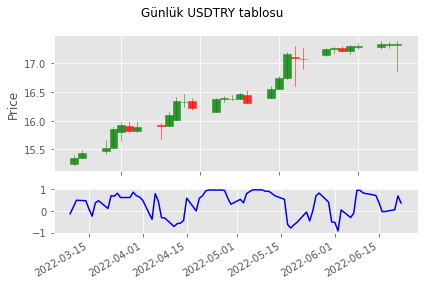

In [42]:

plt.style.use('ggplot')
fig, (ax,ax2) = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]})
candlestick_ohlc(ax, ohlc.values, width=1, colorup='green', colordown='red', alpha=0.8)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Günlük USDTRY tablosu')
ax2.plot(cnhc['time'], cnhc['TRY'], color='blue', label='TRY')
# Formatting Date
date_format = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(date_format)
fig.autofmt_xdate()
fig.tight_layout()

plt.show()

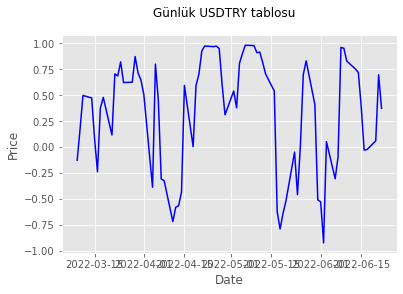

In [30]:
plt.style.use('ggplot')
fig, ax = plt.subplots()
ax.set_xlabel('Date')
ax.set_ylabel('Price')
fig.suptitle('Günlük USDTRY tablosu')

ax.plot(cnhc['time'], cnhc['TRY'], color='blue', label='TRY')
plt.show()

In [23]:
df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4]})
df['ass']= df['B'].rolling(2).mean()
df

,B,ass
0,0.0,NaN
1,1.0,0.5
2,2.0,1.5
3,NaN,NaN
4,4.0,NaN


In [98]:
df.rolling(3).sum()

,B
0,NaN
1,NaN
2,3.0
3,NaN
4,NaN


In [60]:
class Correlation:
    def __init__(self,first,second,candle):
        self.first = first
        self.second = second
        self.candle=candle

    def get_rates(self):
        pos=pd.DataFrame(mt.copy_rates_from(self.first,mt.TIMEFRAME_D1,datetime.now(),self.candle))
        pos['time']=pd.to_datetime(pos['time'],unit ='s')
        pos.loc[:, ['time', 'open', 'high', 'low', 'close']]
        
        pos2=pd.DataFrame(mt.copy_rates_from(self.second,mt.TIMEFRAME_D1,datetime.now(),self.candle))
        pos2['time']=pd.to_datetime(pos2['time'],unit ='s')
        pos2.loc[:, ['time', 'open', 'high', 'low', 'close']]
        
        return pos,pos2
    
    def Corr(self):
        one = pos[['time','close']]
        one.rename(columns={'close':self.first},inplace=True)
        two = self.pos2[['time','close']]
        two.rename(columns={'close':self.second},inplace=True)
        onetwo = two.merge(one, how='inner')
        
        onetwo=onetwo.set_index('time')
        cnr=cnhtry.rolling(5).corr(method='pearson')
        cnr=cnr.reset_index().drop(['level_1'],axis=1)
        cnhc=cnr.drop_duplicates(subset=['time'])
        return cnhc
   # def show_plot(pos):
    
    

In [112]:
class Correlation2:
    def __init__(self,first,second,candle,correlation=8):
        self.first = first
        self.second = second
        self.candle=candle
        self.correlation=correlation

    def get_rates(self):
        pos=pd.DataFrame(mt.copy_rates_from(self.first,mt.TIMEFRAME_D1,datetime.now(),self.candle))
        pos['time']=pd.to_datetime(pos['time'],unit ='s')
        pos.loc[:, ['time', 'open', 'high', 'low', 'close']]
        
        pos2=pd.DataFrame(mt.copy_rates_from(self.second,mt.TIMEFRAME_D1,datetime.now(),self.candle))
        pos2['time']=pd.to_datetime(pos2['time'],unit ='s')
        pos2.loc[:, ['time', 'open', 'high', 'low', 'close']]
        
        return pos,pos2
    
    def Corr(self):
        pos=pd.DataFrame(mt.copy_rates_from(self.first,mt.TIMEFRAME_D1,datetime.now(),self.candle))
        pos['time']=pd.to_datetime(pos['time'],unit ='s')
        pos.loc[:, ['time', 'open', 'high', 'low', 'close']]
        
        pos2=pd.DataFrame(mt.copy_rates_from(self.second,mt.TIMEFRAME_D1,datetime.now(),self.candle))
        pos2['time']=pd.to_datetime(pos2['time'],unit ='s')
        pos2.loc[:, ['time', 'open', 'high', 'low', 'close']]
        
        one = pos[['time','close']]
        one.rename(columns={'close':self.first},inplace=True)
        two = pos2[['time','close']]
        two.rename(columns={'close':self.second},inplace=True)
        onetwo = two.merge(one, how='inner')
        
        onetwo=onetwo.set_index('time')
        onetwo=onetwo.rolling(self.correlation).corr(method='pearson')
        onetwo=onetwo.reset_index().drop(['level_1'],axis=1)
        cres=onetwo.drop_duplicates(subset=['time'])
        
        ohlc=pos.loc[:, ['time', 'open', 'high', 'low', 'close']]
        ohlc['time'] = ohlc['time'].apply(mpl_dates.date2num)
        ohlc = ohlc.astype(float)
        
        plt.style.use('ggplot')
        fig, (ax,ax2) = plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]})
        candlestick_ohlc(ax, ohlc.values, width=1, colorup='green', colordown='red', alpha=0.8)
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        fig.suptitle('Günlük {} tablosu'.format(self.first))
        ax2.plot(cres['time'], cres[self.first], color='blue', label=self.first)
        ax2.set_xlabel('Correlation :{} - {}'.format(self.first,self.second))
        # Formatting Date
        date_format = mpl_dates.DateFormatter('%d-%m-%Y')
        ax.xaxis.set_major_formatter(date_format)
        fig.autofmt_xdate()
        fig.tight_layout()

        plt.show()
        
        
   # def show_plot(pos):
    

In [110]:
%matplotlib notebook

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


<IPython.core.display.Javascript object>


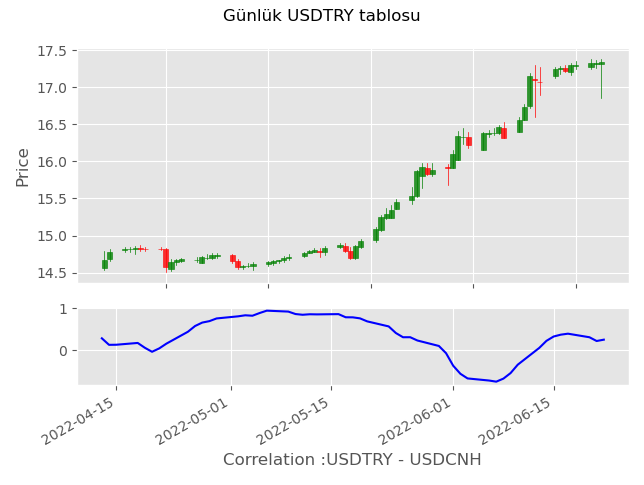

In [111]:
obje = Correlation2('USDTRY','USDCNH',candle=70,correlation=20)
obje.Corr()